In [36]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm

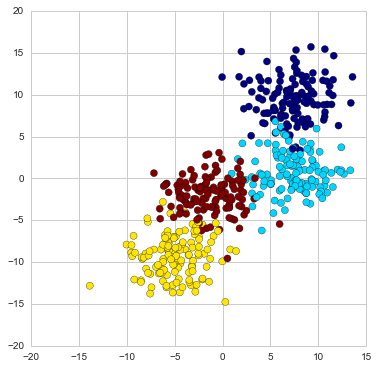

In [27]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = 500, centers = 4,random_state = 8,cluster_std=2.4)
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = "jet")

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
def visualize_tree(classifier, X,y, boundaries = True, xlim = None, ylim = None):
    classifier.fit(X,y)
    if xlim is None:
        xlim = (X[:,0].min()-.1,X[:,0].max()+.1)
    if ylim is None:
        ylim = (X[:,1].min()-.1,X[:,1].max()+.1)
        
    x_min,x_max = xlim
    y_min,y_max = ylim

    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                        np.linspace(y_min,y_max,100))
    Z= classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (10,10))
    plt.pcolormesh(xx,yy,Z,alpha=.2,cmap = 'jet')

    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

    plt.xlim(y_min,x_max)
    plt.ylim(y_min,y_max)

    def plot_boundaries(i, xlim,ylim):
        if i<0:
            return
        tree = classifier.tree_

        if tree.feature[i]==0:
            plt.plot([tree.threshold[i],tree.threshold[i]],ylim,'-k')
            plot_boundaries(tree.children_left[i],xlim,[ylim[0],tree.threshold[i]])

        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i],tree.threshold[i]],'-k')
            plot_boundaries(tree.children_left[i],xlim,[ylim[0],tree.threshold[i]])
            plot_boundaries(tree.children_right[i],xlim,[tree.threshold[i],ylim[1]])
    if boundaries:
        plot_boundaries(0,plt.xlim(),plt.ylim())

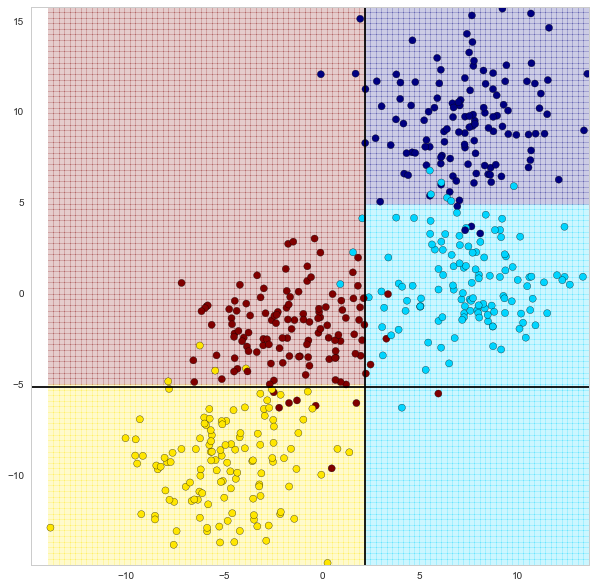

In [31]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
visualize_tree(clf,X,y)

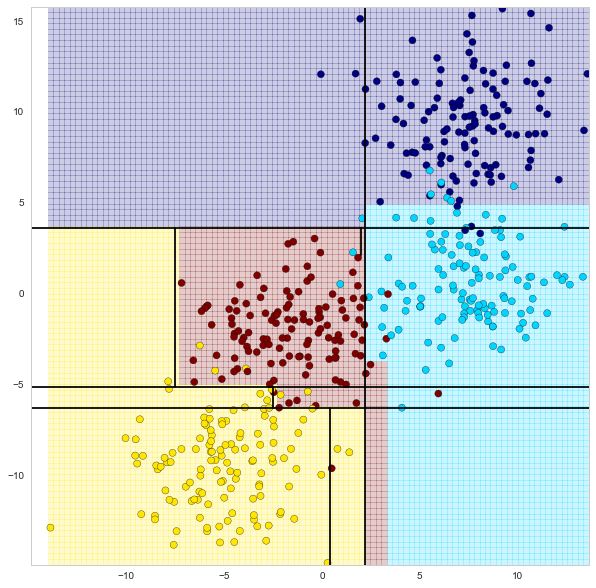

In [32]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)
visualize_tree(clf,X,y)

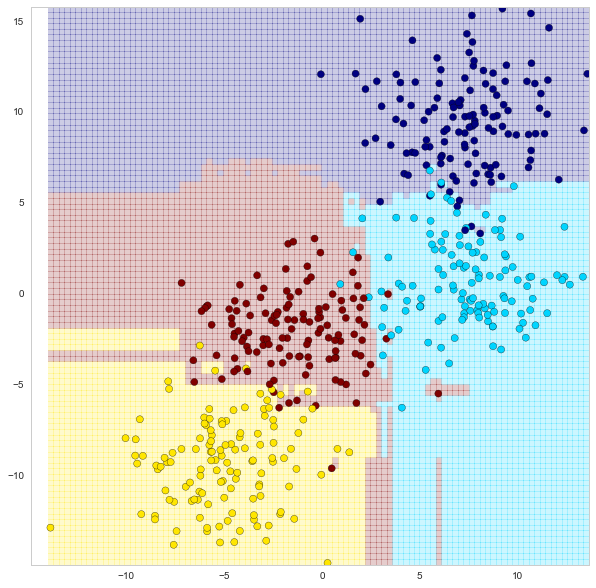

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,random_state = 0)
visualize_tree(clf,X,y,boundaries = False)

In [39]:
x = 10*np.random.rand(100)

In [41]:
def sin_model(x,sigma=0.2):
    noise = sigma * np.random.rand(len(x))
    return np.sin(5*x) + np.sin(.5*x) + noise

In [42]:
y = sin_model(x)

<Container object of 3 artists>

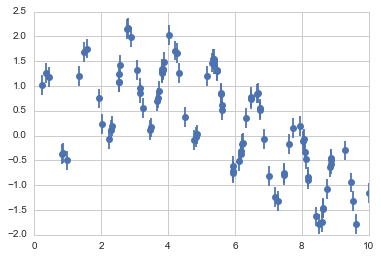

In [45]:
plt.errorbar(x,y,0.2,fmt = 'o')

In [48]:
from sklearn.ensemble import RandomForestRegressor
xfit = np.linspace(0,10,1000)
rfr = RandomForestRegressor(100)
rfr.fit(x[:,None],y)
yfit = rfr.predict(xfit[:,None])

In [51]:
ytrue = sin_model(xfit,0)

<Container object of 3 artists>

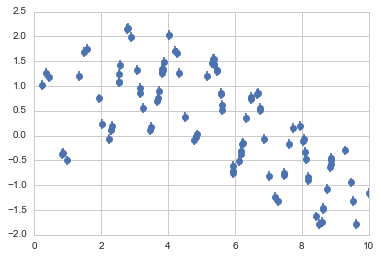

In [52]:
plt.errorbar(x,y,.1,fmt='o')

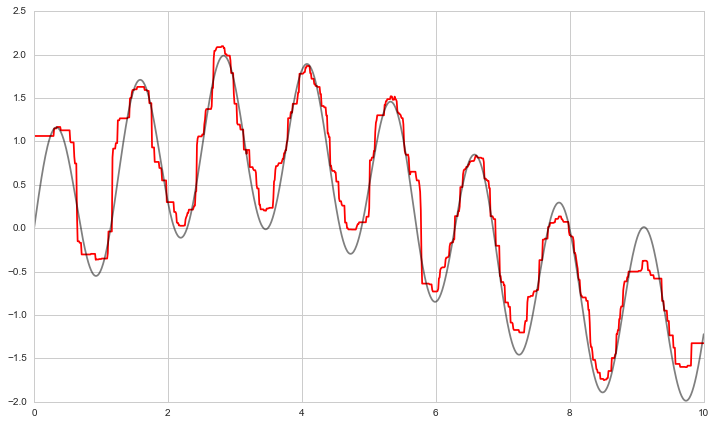

In [54]:
plt.figure(figsize=(12,7))
plt.plot(xfit,yfit,'r')
plt.plot(xfit,ytrue,'-k',alpha=.5)